In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import prettytable as pt
from matplotlib import pyplot as plt
import os 
import warnings
warnings.filterwarnings("ignore")

###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir+ os.sep + os.pardir )
datadirectory=directory+"/data/yielddata/yielddata.csv"
configdirectory=directory+"/yieldcurve/samplecurves/config"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 



In [2]:
yieldcurveconfig=configdirectory+"/eurois.json"
f = open (yieldcurveconfig, "r")
eurois = json.loads(f.read())


In [3]:
ycresult =  {
    "valuationDate": "2021-03-10",
    "yieldCurve":eurois ,
    "yieldData": yielddata.to_dict('r')
}
try:
    result = api.createTask(CalculationType.YIELD_CURVE, ycresult,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()

In [4]:
zerorates=result.get("zeroRates"),
discountrates=result.get("discountRates")
dates=[]
forwarddates= {}
rhoovayieldcurvedicts = {}
rhoovayieldcurvediscounts = {}
for rhvzr in zerorates[0]:
    rhoovayieldcurvedicts[datetime.strptime(rhvzr.get('date'),'%Y-%m-%d').date()] = rhvzr.get('rate')*100
    dates.append(rhvzr.get('date'))

for rhv in discountrates:
    rhoovayieldcurvediscounts[datetime.strptime(rhv.get('date'), '%Y-%m-%d').date()] = rhv.get('rate')
    

In [5]:
bloombergeoniazeros=[-0.47700,-0.48363,-0.48669,-0.48925,-0.4893,-0.49092,-0.49103,-0.49265,-0.49377,-0.49489,-0.49565,
                -0.4956,-0.49571,-0.49708,-0.49694,-0.49703,-0.49783,-0.49804,-0.4832,-0.47168,-0.42914,-0.37548,
                -0.31472,-0.24578,-0.18482,-0.1166,-0.0543,0.00925,0.06995,0.20776,0.32847,0.35852,0.34694,0.33768,
                0.32052,0.29055]
bloombergeoniadiscountfactors=[1.0,1.00004,1.000093,1.000188,1.000416,1.000821,1.001265,1.001648,1.002072,1.002512,1.00291,
                          1.003332,1.003755,1.004176,1.004626,1.00501,1.007516,1.010024,1.012173,1.014264,1.017326,
                          1.018962,1.019071,1.017374,1.014906,1.010556,1.005448,0.998983,0.991631,0.969295,0.936376,
                          0.914215,0.901084,0.888445,0.879578,0.8647023]

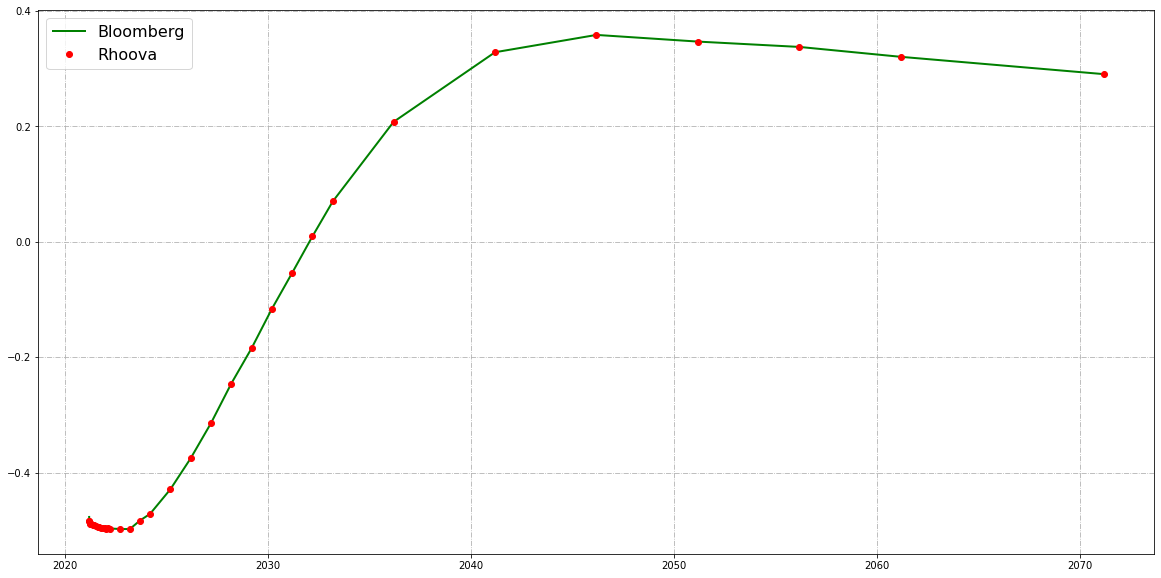

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvedicts.keys())
y1 =bloombergeoniazeros
y2 = list(rhoovayieldcurvedicts.values())


ax.plot(x,y1, 'g', label='Bloomberg', linewidth=2)
ax.plot(x,y2, 'ro', label='Rhoova', linewidth=4)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

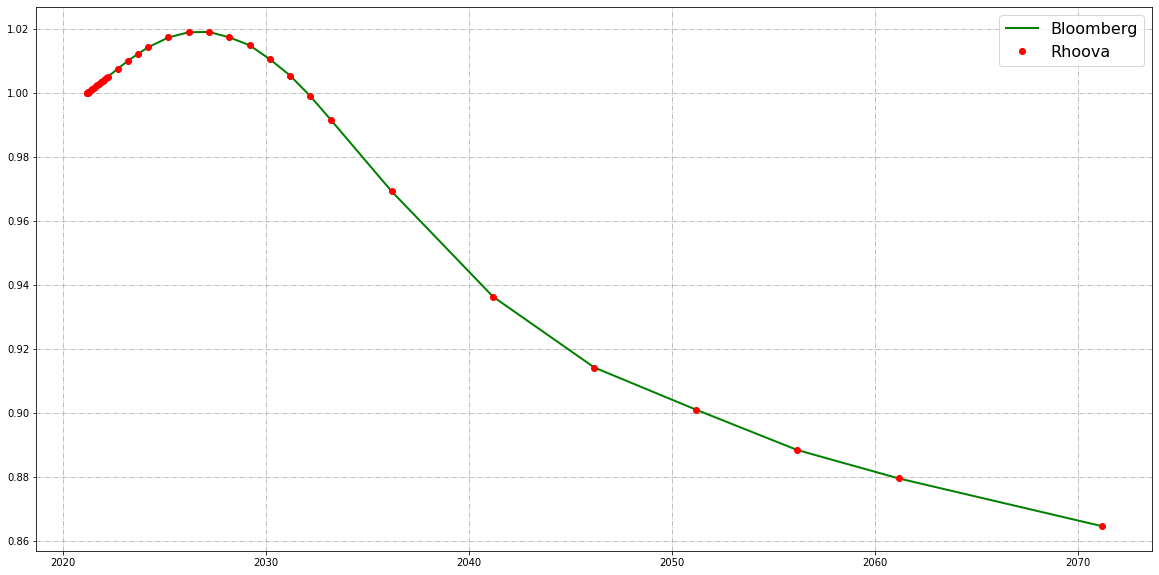

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvediscounts.keys())
y1 =bloombergeoniadiscountfactors
y2 = list(rhoovayieldcurvediscounts.values())

ax.plot(x,y1, 'g', label='Bloomberg', linewidth=2)
ax.plot(x,y2, 'ro', label='Rhoova', linewidth=12)

leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

In [8]:
pTable = pt.PrettyTable(['Maturity','Rhoova ZeroRates','Bloomberg ZR','Rhoova Discount Rate','Bloomberg DR'])
i=0
for key, val in rhoovayieldcurvedicts.items():
    pTable.add_row([key, val,bloombergeoniazeros[i],rhoovayieldcurvediscounts.get(key),bloombergeoniadiscountfactors[i]])
    i=i+1
pTable.align = 'c'
pTable.float_format = '.6'
print(pTable)

+------------+------------------+--------------+----------------------+--------------+
|  Maturity  | Rhoova ZeroRates | Bloomberg ZR | Rhoova Discount Rate | Bloomberg DR |
+------------+------------------+--------------+----------------------+--------------+
| 2021-03-12 |    -0.483635     |  -0.477000   |          1           |   1.000000   |
| 2021-03-15 |    -0.483635     |  -0.483630   |       1.000040       |   1.000040   |
| 2021-03-19 |    -0.486689     |  -0.486690   |       1.000093       |   1.000093   |
| 2021-03-26 |    -0.489247     |  -0.489250   |       1.000188       |   1.000188   |
| 2021-04-12 |    -0.489303     |  -0.489300   |       1.000416       |   1.000416   |
| 2021-05-12 |    -0.490924     |  -0.490920   |       1.000821       |   1.000821   |
| 2021-06-14 |    -0.491033     |  -0.491030   |       1.001265       |   1.001265   |
| 2021-07-12 |    -0.492648     |  -0.492650   |       1.001648       |   1.001648   |
| 2021-08-12 |    -0.493768     |  -0.49377

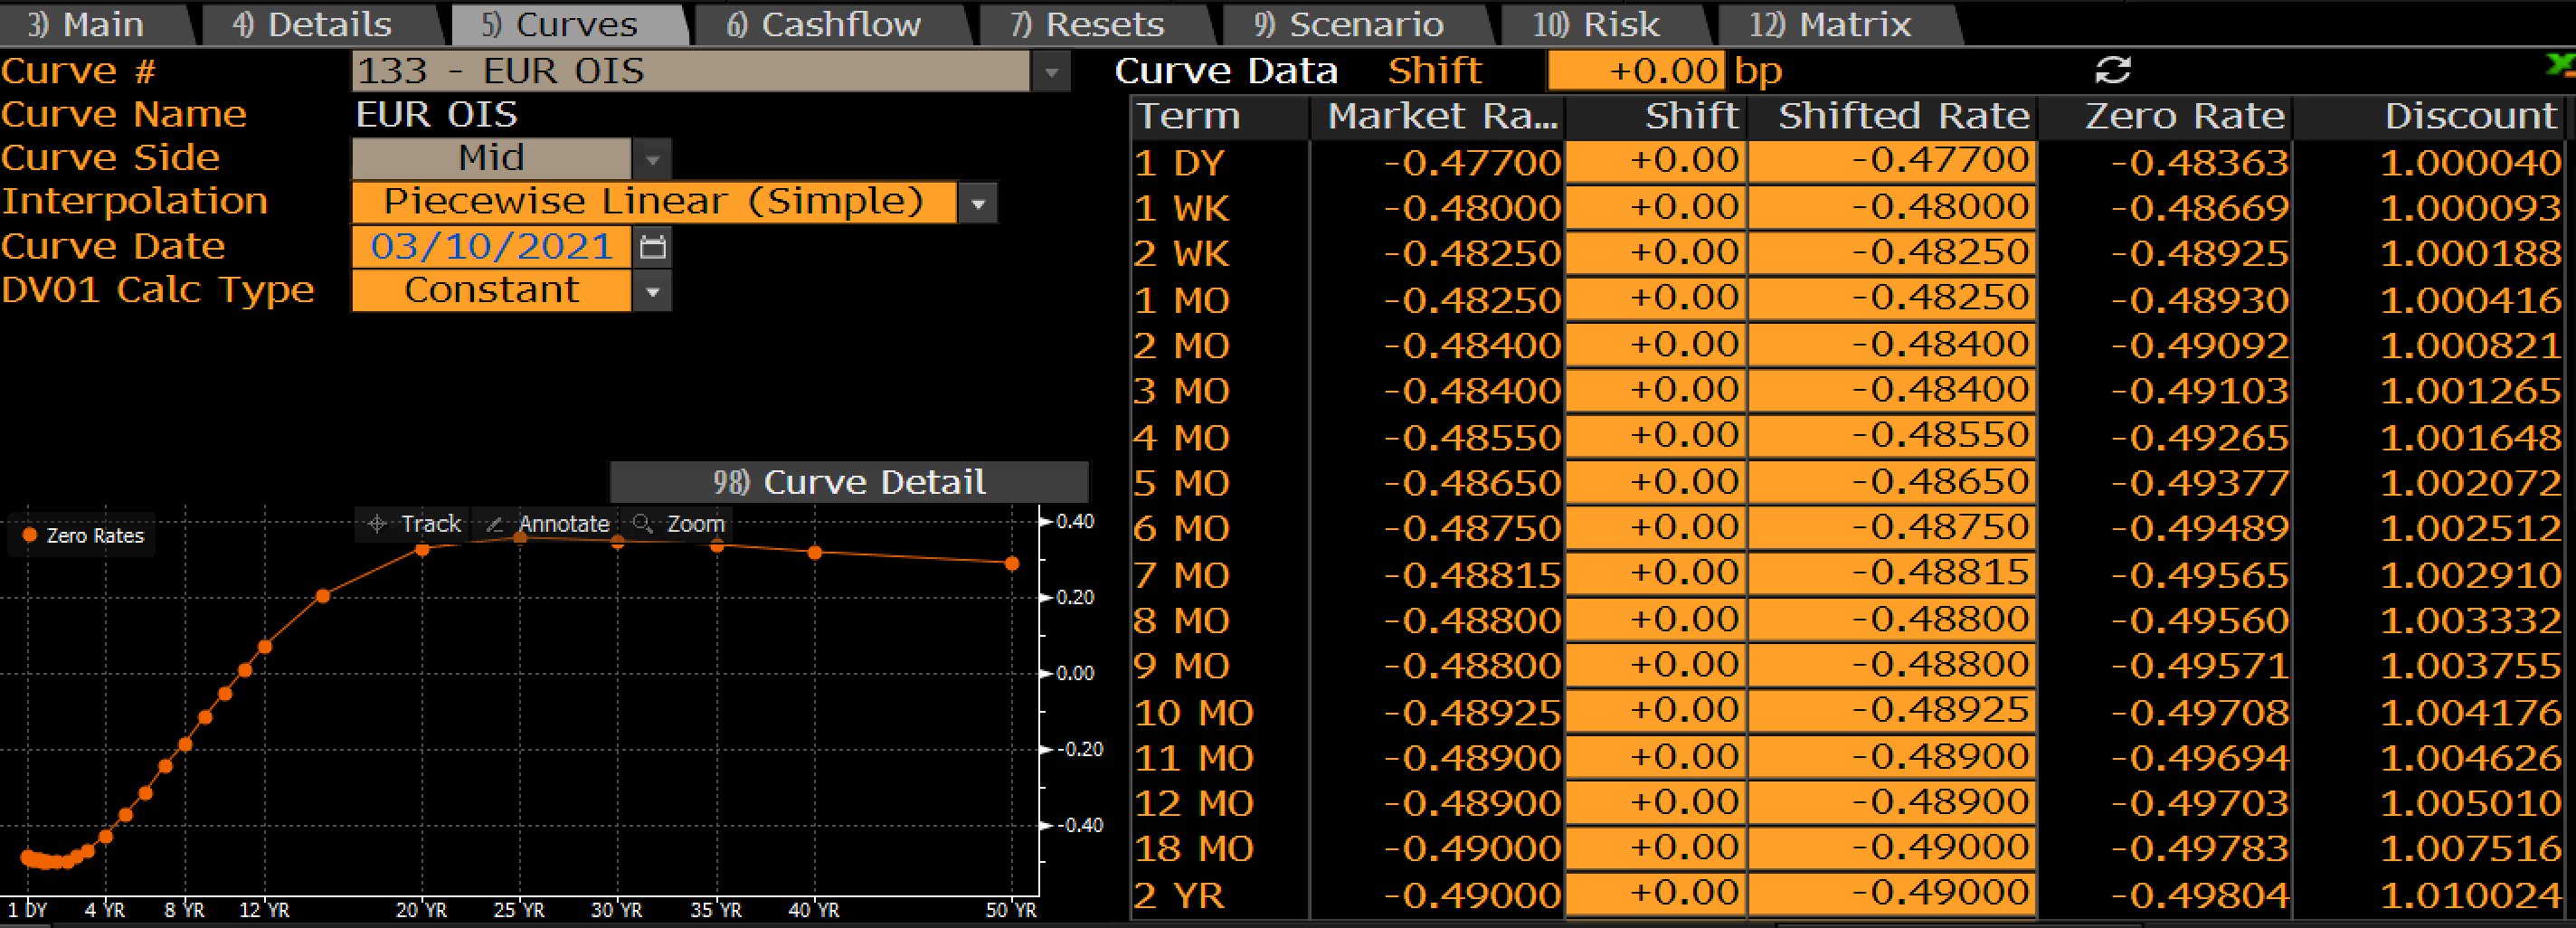